In [ ]:
!pip install TurkishStemmer
!pip -q install stanza
!pip install -q spacy

In [ ]:
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from TurkishStemmer import TurkishStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
metin = """Teknolojinin hızla geliştiği günümüzde, dijitalleşme artık sadece bir tercih değil, hayatın ayrılmaz bir parçası hâline gelmiştir. İnsanlar bilgiye ulaşmak, iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hâle gelmiştir. Bu durum, insan davranışlarını, düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir. Eskiden bilgiye ulaşmak zaman ve emek isterken, bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür. Ancak bu hız, beraberinde bilgi kirliliğini, manipülasyonu ve dikkat dağınıklığını da getirmiştir. İnsanlar artık yalnızca bilgi tüketicisi değil, aynı zamanda bilgi üreticisidir. Her birey, sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hâline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştır.

Bu noktada yapay zekâ ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır. Bilgisayarların insan dilini anlayabilmesi, yorumlayabilmesi ve yeniden üretebilmesi, modern teknolojinin en dikkat çekici başarılarından biridir. Doğal dil işleme, metinleri analiz ederek anlam çıkarma, duygusal ton belirleme, özetleme ve otomatik çeviri gibi görevlerde aktif olarak kullanılmaktadır. Türkçe gibi eklemeli bir dilde başarılı sonuçlar elde etmek, dilin yapısal karmaşıklığı nedeniyle oldukça zordur. Ancak son yıllarda geliştirilen Türkçe dil modelleri, bu alandaki ilerlemenin hızla arttığını göstermektedir. Türkçe BERT, ELECTRA ve benzeri derin öğrenme tabanlı sistemler, kelime köklerini, ekleri ve bağlamı dikkate alarak etkileyici performanslar sergilemektedir.

Bununla birlikte, teknolojinin ilerlemesi etik ve toplumsal sorumluluk konularını da gündeme getirmiştir. Bir yapay zekâ modelinin eğitildiği verilerde bulunan önyargılar, doğrudan sonuçlara yansıyabilir ve farkında olmadan ayrımcılığa neden olabilir. Bu nedenle geliştiricilerin, kullandıkları verilerin çeşitliliğine ve tarafsızlığına dikkat etmesi büyük önem taşır. Aynı zamanda kullanıcıların da dijital farkındalığını artırması, bilgiyi sorgulaması ve bilinçli teknoloji kullanımı konusunda kendini geliştirmesi gerekmektedir.

Sonuç olarak dijital çağ, insanlığın hem en büyük fırsatlarını hem de en karmaşık sorunlarını içinde barındırmaktadır. Teknolojiyi doğru kullanan, etik değerlere sahip çıkan ve bilgiyi sorumluluk bilinciyle yöneten toplumlar, geleceğin dijital dünyasında güçlü ve sürdürülebilir bir yer edinecektir."""

In [ ]:
metin = metin.lower()
print ("1. küçük harf:", metin)

1. küçük harf: teknolojinin hızla geliştiği günümüzde, dijitalleşme artık sadece bir tercih değil, hayatın ayrılmaz bir parçası hâline gelmiştir. i̇nsanlar bilgiye ulaşmak, iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hâle gelmiştir. bu durum, insan davranışlarını, düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir. eskiden bilgiye ulaşmak zaman ve emek isterken, bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür. ancak bu hız, beraberinde bilgi kirliliğini, manipülasyonu ve dikkat dağınıklığını da getirmiştir. i̇nsanlar artık yalnızca bilgi tüketicisi değil, aynı zamanda bilgi üreticisidir. her birey, sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hâline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştır.

bu noktada yapay zekâ ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır. bilgisayarların insan dilini anlayabilmesi, yorumlayabilmesi 

In [ ]:
metin = re.sub(r'[^\w\sçğıöşü]' , '' , metin)
print ("2. noktalama temiz: ", metin)

2. noktalama temiz:  teknolojinin hızla geliştiği günümüzde dijitalleşme artık sadece bir tercih değil hayatın ayrılmaz bir parçası hâline gelmiştir insanlar bilgiye ulaşmak iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hâle gelmiştir bu durum insan davranışlarını düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir eskiden bilgiye ulaşmak zaman ve emek isterken bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür ancak bu hız beraberinde bilgi kirliliğini manipülasyonu ve dikkat dağınıklığını da getirmiştir insanlar artık yalnızca bilgi tüketicisi değil aynı zamanda bilgi üreticisidir her birey sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hâline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştır

bu noktada yapay zekâ ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır bilgisayarların insan dilini anlayabilmesi yorumlayabilmesi ve yeniden üret

In [ ]:
metin = re.sub(r'[^a-zçğıöşü\s.,?!]', '', metin)
print ("3. özel karakter ve sayı temiz: ", metin)

3. özel karakter ve sayı temiz:  teknolojinin hızla geliştiği günümüzde dijitalleşme artık sadece bir tercih değil hayatın ayrılmaz bir parçası hline gelmiştir insanlar bilgiye ulaşmak iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hle gelmiştir bu durum insan davranışlarını düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir eskiden bilgiye ulaşmak zaman ve emek isterken bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür ancak bu hız beraberinde bilgi kirliliğini manipülasyonu ve dikkat dağınıklığını da getirmiştir insanlar artık yalnızca bilgi tüketicisi değil aynı zamanda bilgi üreticisidir her birey sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştır

bu noktada yapay zek ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır bilgisayarların insan dilini anlayabilmesi yorumlayabilmesi ve yeni

In [ ]:
import stanza
stanza.download('tr')
nlp = stanza.Pipeline("tr", processors="tokenize, pos, lemma, ner", tokenize_no_ssplit=False)
doc = nlp(metin)
print(doc)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: tr (Turkish) ...
INFO:stanza:File exists: /root/stanza_resources/tr/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: tr (Turkish):
| Processor | Package       |
-----------------------------
| tokenize  | imst          |
| mwt       | imst          |
| pos       | imst_charlm   |
| lemma     | imst_nocharlm |
| ner       | starlang      |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[
  [
    {
      "id": 1,
      "text": "teknolojinin",
      "lemma": "teknoloji",
      "upos": "NOUN",
      "xpos": "Noun",
      "feats": "Case=Gen|Number=Sing|Person=3",
      "start_char": 0,
      "end_char": 12,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 2,
      "text": "hızla",
      "lemma": "hız",
      "upos": "NOUN",
      "xpos": "Noun",
      "feats": "Case=Ins|Number=Sing|Person=3",
      "start_char": 13,
      "end_char": 18,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 3,
      "text": "geliştiği",
      "lemma": "geliş",
      "upos": "VERB",
      "xpos": "Verb",
      "feats": "Aspect=Perf|Mood=Ind|Number[psor]=Sing|Person[psor]=3|Polarity=Pos|Tense=Past|VerbForm=Part",
      "start_char": 19,
      "end_char": 28,
      "ner": "O",
      "multi_ner": [
        "O"
      ]
    },
    {
      "id": 4,
      "text": "günümüzde",
      "lemma": "gün",
      "upos": "NOUN",
      "xpos"

In [ ]:
lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
print(lemmas)

['teknoloji', 'hız', 'geliş', 'gün', 'dijitalleş', 'artık', 'sadece', 'bir', 'tercih', 'değil', 'hayat', 'ayrıl', 'bir', 'parça', 'hl', 'gel', 'insan', 'bilgi', 'ulaş', 'iletişim', 'kur', 've', 'hatta', 'sosyalleş', 'için', 'dijital', 'platform', 'bağım', 'li', 'hl', 'gel', 'bu', 'durum', 'insan', 'davranış', 'düşün', 'biçim', 've', 'toplumsal', 'değer', 'kök', 'değiş', 'bir', 'dönüşüm', 'süreç', 'beraber', 'getir', 'eski', 'bilgi', 'ulaş', 'zaman', 've', 'emek', 'iste', 'bugün', 'birkaç', 'saniye', 'binlerce', 'farklı', 'kaynak', 'eriş', 'mümkün', 'ancak', 'bu', 'hız', 'beraber', 'bilgi', 'kirlilik', 'manipülasyon', 've', 'dikkat', 'dağınıklık', 'da', 'getir', 'insan', 'artık', 'yalnızca', 'bilgi', 'tüketici', 'değil', 'aynı', 'zaman', 'bilgi', 'üretici', 'i', 'her', 'birey', 'sosyal', 'medya', 'paylaşım', 'dijital', 'dünya', 'bir', 'parça', 'hl', 'gel', 've', 'bu', 'saye', 'dijital', 'ekosistem', 'sürekli', 'büyü', 'katkı', 'sağla', '"', 'bu', 'nokta', 'yapay', 'zek', 've', 'özellikl

In [ ]:
!pip install scikit-learn

In [ ]:
document = ["""Teknolojinin hızla geliştiği günümüzde, dijitalleşme artık sadece bir tercih değil, hayatın ayrılmaz bir parçası hâline gelmiştir. İnsanlar bilgiye ulaşmak, iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hâle gelmiştir. Bu durum, insan davranışlarını, düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir. Eskiden bilgiye ulaşmak zaman ve emek isterken, bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür. Ancak bu hız, beraberinde bilgi kirliliğini, manipülasyonu ve dikkat dağınıklığını da getirmiştir. İnsanlar artık yalnızca bilgi tüketicisi değil, aynı zamanda bilgi üreticisidir. Her birey, sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hâline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştır.

Bu noktada yapay zekâ ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır. Bilgisayarların insan dilini anlayabilmesi, yorumlayabilmesi ve yeniden üretebilmesi, modern teknolojinin en dikkat çekici başarılarından biridir. Doğal dil işleme, metinleri analiz ederek anlam çıkarma, duygusal ton belirleme, özetleme ve otomatik çeviri gibi görevlerde aktif olarak kullanılmaktadır. Türkçe gibi eklemeli bir dilde başarılı sonuçlar elde etmek, dilin yapısal karmaşıklığı nedeniyle oldukça zordur. Ancak son yıllarda geliştirilen Türkçe dil modelleri, bu alandaki ilerlemenin hızla arttığını göstermektedir. Türkçe BERT, ELECTRA ve benzeri derin öğrenme tabanlı sistemler, kelime köklerini, ekleri ve bağlamı dikkate alarak etkileyici performanslar sergilemektedir.

Bununla birlikte, teknolojinin ilerlemesi etik ve toplumsal sorumluluk konularını da gündeme getirmiştir. Bir yapay zekâ modelinin eğitildiği verilerde bulunan önyargılar, doğrudan sonuçlara yansıyabilir ve farkında olmadan ayrımcılığa neden olabilir. Bu nedenle geliştiricilerin, kullandıkları verilerin çeşitliliğine ve tarafsızlığına dikkat etmesi büyük önem taşır. Aynı zamanda kullanıcıların da dijital farkındalığını artırması, bilgiyi sorgulaması ve bilinçli teknoloji kullanımı konusunda kendini geliştirmesi gerekmektedir.

Sonuç olarak dijital çağ, insanlığın hem en büyük fırsatlarını hem de en karmaşık sorunlarını içinde barındırmaktadır. Teknolojiyi doğru kullanan, etik değerlere sahip çıkan ve bilgiyi sorumluluk bilinciyle yöneten toplumlar, geleceğin dijital dünyasında güçlü ve sürdürülebilir bir yer edinecektir."""]

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(document)
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_tfidf.index = [f"belge {i+1}" for i in range(len(document))]
from IPython.display import display
display(df_tfidf)

,aktif,alandaki,alarak,analiz,ancak,anlam,anlayabilmesi,arttığını,artık,artırması,...,çeşitliliğine,çıkan,çıkarma,önem,önyargılar,özellikle,özetleme,öğrenme,üretebilmesi,üreticisidir
belge 1,0.036686,0.036686,0.036686,0.036686,0.073373,0.036686,0.036686,0.036686,0.073373,0.036686,...,0.036686,0.036686,0.036686,0.073373,0.036686,0.036686,0.036686,0.036686,0.036686,0.036686


In [ ]:
tfidf_scores = df_tfidf.iloc[0]
tfidf_series = pd.Series(tfidf_scores, index=df_tfidf.columns)
top_ten_words = tfidf_series.sort_values(ascending=False).head(10)
print("En Yüksek TF-IDF Değerine Sahip İlk 10 Kelime:\n", top_ten_words)

En Yüksek TF-IDF Değerine Sahip İlk 10 Kelime:
 ve              0.586983
bir             0.256805
dijital         0.220119
bu              0.220119
en              0.110059
büyük           0.110059
dil             0.110059
dikkat          0.110059
da              0.110059
teknolojinin    0.110059
Name: belge 1, dtype: float64


In [ ]:
for sentence in doc.sentences:
    sentence_text = sentence.text
    words = [word.text for word in sentence.words]
    print(f"Cümle: \"{sentence_text}\" | Kelime sayısı: {len(words)}")

Cümle: "teknolojinin hızla geliştiği günümüzde dijitalleşme artık sadece bir tercih değil hayatın ayrılmaz bir parçası hline gelmiştir insanlar bilgiye ulaşmak iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hle gelmiştir bu durum insan davranışlarını düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir eskiden bilgiye ulaşmak zaman ve emek isterken bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür ancak bu hız beraberinde bilgi kirliliğini manipülasyonu ve dikkat dağınıklığını da getirmiştir insanlar artık yalnızca bilgi tüketicisi değil aynı zamanda bilgi üreticisidir her birey sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştı" | Kelime sayısı: 105
Cümle: "r" | Kelime sayısı: 1
Cümle: "bu noktada yapay zek ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır bilgisayarların insan dilini anlay

In [ ]:
words = [word.text.lower() for sentence in doc.sentences for word in sentence.words if word.text.isalpha()]
unique_words = set(words)
print(f"Benzersiz alfabetik kelime sayısı: {len(unique_words)}")

Benzersiz alfabetik kelime sayısı: 227


In [ ]:
if 'doc' in locals():
    lemmas = [word.lemma for sentence in doc.sentences for word in sentence.words]
    unique_lemmas = set(lemmas)
    print(f"Benzersiz lemma sayısı (kelime kökü): {len(unique_lemmas)}")
else:
    print("Lütfen 'doc' nesnesini oluşturun.")

Benzersiz lemma sayısı (kelime kökü): 192


In [ ]:
from spacy import displacy


if 'doc' in locals():
    print("Cümlelerin bağımlılık şemaları:")

    for i, sentence in enumerate(doc.sentences):

        sentence_data = {
            "words": [],
            "arcs": []
        }

        word_map = {}
        for j, word in enumerate(sentence.words):
            sentence_data["words"].append({"text": word.text, "tag": word.pos})
            word_map[word.id] = j
        for word in sentence.words:
            if word.head is not None and word.head > 0:
                start_index = word_map.get(word.head)
                end_index = word_map.get(word.id)

                if start_index is not None and end_index is not None:
                    label = word.deprel


                    direction = "left" if start_index < end_index else "right"

                    sentence_data["arcs"].append({
                        "start": start_index,
                        "end": end_index,
                        "label": label,
                        "dir": direction
                    })
            elif word.deprel == 'root':
                 pass

        print(f"\nCümle {i+1}: \"{sentence.text}\"")
        if sentence_data["words"]:
             displacy.render(sentence_data, style="dep", manual=True, jupyter=True)
        else:
             print("Bu cümlede görselleştirilebilecek kelime yok.")

        print("-" * 50)
else:
    print("Lütfen 'doc' nesnesini oluşturun.")

Cümlelerin bağımlılık şemaları:

Cümle 1: "teknolojinin hızla geliştiği günümüzde dijitalleşme artık sadece bir tercih değil hayatın ayrılmaz bir parçası hline gelmiştir insanlar bilgiye ulaşmak iletişim kurmak ve hatta sosyalleşmek için dijital platformlara bağımlı hle gelmiştir bu durum insan davranışlarını düşünme biçimlerini ve toplumsal değerleri kökten değiştiren bir dönüşüm sürecini beraberinde getirmiştir eskiden bilgiye ulaşmak zaman ve emek isterken bugün birkaç saniyede binlerce farklı kaynağa erişmek mümkündür ancak bu hız beraberinde bilgi kirliliğini manipülasyonu ve dikkat dağınıklığını da getirmiştir insanlar artık yalnızca bilgi tüketicisi değil aynı zamanda bilgi üreticisidir her birey sosyal medya paylaşımlarıyla dijital dünyanın bir parçası hline gelmiş ve bu sayede dijital ekosistemin sürekli büyümesine katkı sağlamıştı"


--------------------------------------------------

Cümle 2: "r"


--------------------------------------------------

Cümle 3: "bu noktada yapay zek ve özellikle doğal dil işleme teknolojileri büyük önem kazanmıştır bilgisayarların insan dilini anlayabilmesi yorumlayabilmesi ve yeniden üretebilmesi modern teknolojinin en dikkat çekici başarılarından biridir doğal dil işleme metinleri analiz ederek anlam çıkarma duygusal ton belirleme özetleme ve otomatik çeviri gibi görevlerde aktif olarak kullanılmaktadır türkçe gibi eklemeli bir dilde başarılı sonuçlar elde etmek dilin yapısal karmaşıklığı nedeniyle oldukça zordur ancak son yıllarda geliştirilen türkçe dil modelleri bu alandaki ilerlemenin hızla arttığını göstermektedir türkçe bert electra ve benzeri derin öğrenme tabanlı sistemler kelime köklerini ekleri ve bağlamı dikkate alarak etkileyici performanslar sergilemektedir"


--------------------------------------------------

Cümle 4: "bununla birlikte teknolojinin ilerlemesi etik ve toplumsal sorumluluk konularını da gündeme getirmiştir bir yapay zek modelinin eğitildiği verilerde bulunan önyargılar doğrudan sonuçlara yansıyabilir ve farkında olmadan ayrımcılığa neden olabilir bu nedenle geliştiricilerin kullandıkları verilerin çeşitliliğine ve tarafsızlığına dikkat etmesi büyük önem taşır aynı zamanda kullanıcıların da dijital farkındalığını artırması bilgiyi sorgulaması ve bilinçli teknoloji kullanımı konusunda kendini geliştirmesi gerekmektedir"


--------------------------------------------------

Cümle 5: "sonuç olarak dijital çağ insanlığın hem en büyük fırsatlarını hem de en karmaşık sorunlarını içinde barındırmaktadır teknolojiyi doğru kullanan etik değerlere sahip çıkan ve bilgiyi sorumluluk bilinciyle yöneten toplumlar geleceğin dijital dünyasında güçlü ve sürdürülebilir bir yer edinecektir"


--------------------------------------------------


In [ ]:
doc = nlp(metin)

for ent in doc.ents:
    print(f"Kelime/İfade: '{ent.text}' | Türü: {ent.type}")

In [ ]:
from nltk.util import ngrams

if 'doc' in locals():

    words = [word.text for sentence in doc.sentences for word in sentence.words]
    bigrams = list(ngrams(words, 2))
    print("İkili N-gram'lar (Bigramlar):")
    print(bigrams)
    print("-" * 30)
    trigrams = list(ngrams(words, 3))
    print("Üçlü N-gram'lar (Trigramlar):")
    print(trigrams)

else:
    print("Lütfen 'doc' nesnesini oluşturun.")

İkili N-gram'lar (Bigramlar):
[('teknolojinin', 'hızla'), ('hızla', 'geliştiği'), ('geliştiği', 'günümüzde'), ('günümüzde', 'dijitalleşme'), ('dijitalleşme', 'artık'), ('artık', 'sadece'), ('sadece', 'bir'), ('bir', 'tercih'), ('tercih', 'değil'), ('değil', 'hayatın'), ('hayatın', 'ayrılmaz'), ('ayrılmaz', 'bir'), ('bir', 'parçası'), ('parçası', 'hline'), ('hline', 'gelmiştir'), ('gelmiştir', 'insanlar'), ('insanlar', 'bilgiye'), ('bilgiye', 'ulaşmak'), ('ulaşmak', 'iletişim'), ('iletişim', 'kurmak'), ('kurmak', 've'), ('ve', 'hatta'), ('hatta', 'sosyalleşmek'), ('sosyalleşmek', 'için'), ('için', 'dijital'), ('dijital', 'platformlara'), ('platformlara', 'bağım'), ('bağım', 'lı'), ('lı', 'hle'), ('hle', 'gelmiştir'), ('gelmiştir', 'bu'), ('bu', 'durum'), ('durum', 'insan'), ('insan', 'davranışlarını'), ('davranışlarını', 'düşünme'), ('düşünme', 'biçimlerini'), ('biçimlerini', 've'), ('ve', 'toplumsal'), ('toplumsal', 'değerleri'), ('değerleri', 'kökten'), ('kökten', 'değiştiren'), ('değ

In [ ]:
from collections import Counter

if 'bigrams' in locals():

    bigram_counts = Counter(bigrams)
    if bigram_counts:
        most_common_bigram = bigram_counts.most_common(1)[0]
        print("En sık geçen ikili N-gram (Bigram):")
        print(f"Grup: {most_common_bigram[0]} | Sayı: {most_common_bigram[1]}")
    else:
        print("Bigram listesi boş, analiz yapılamadı.")

else:
    print("Lütfen önceki hücreyi çalıştırarak bigramları oluşturun.")

En sık geçen ikili N-gram (Bigram):
Grup: ('bir', 'parçası') | Sayı: 2


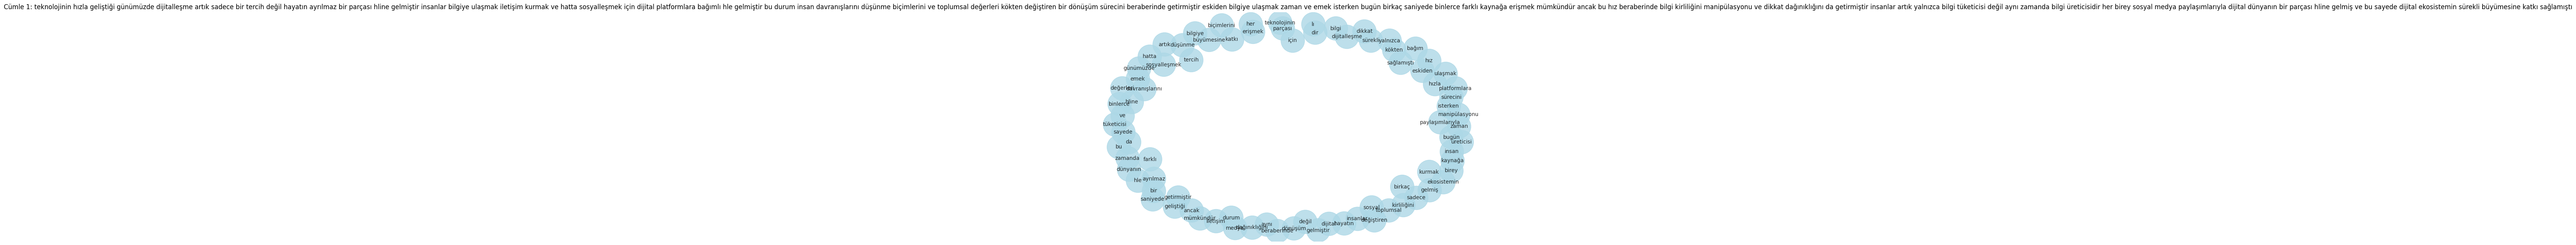

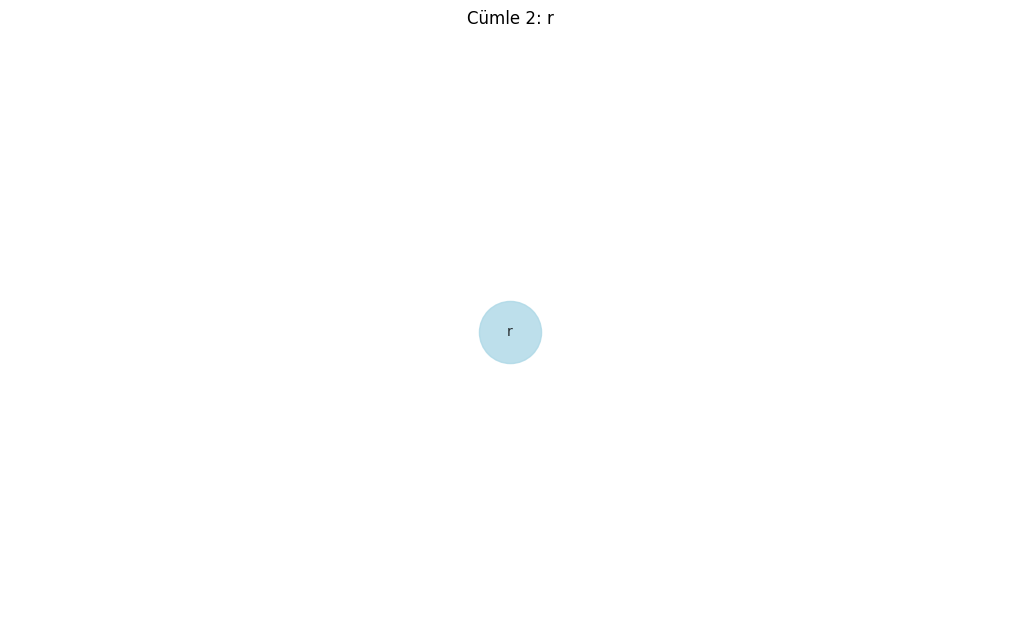

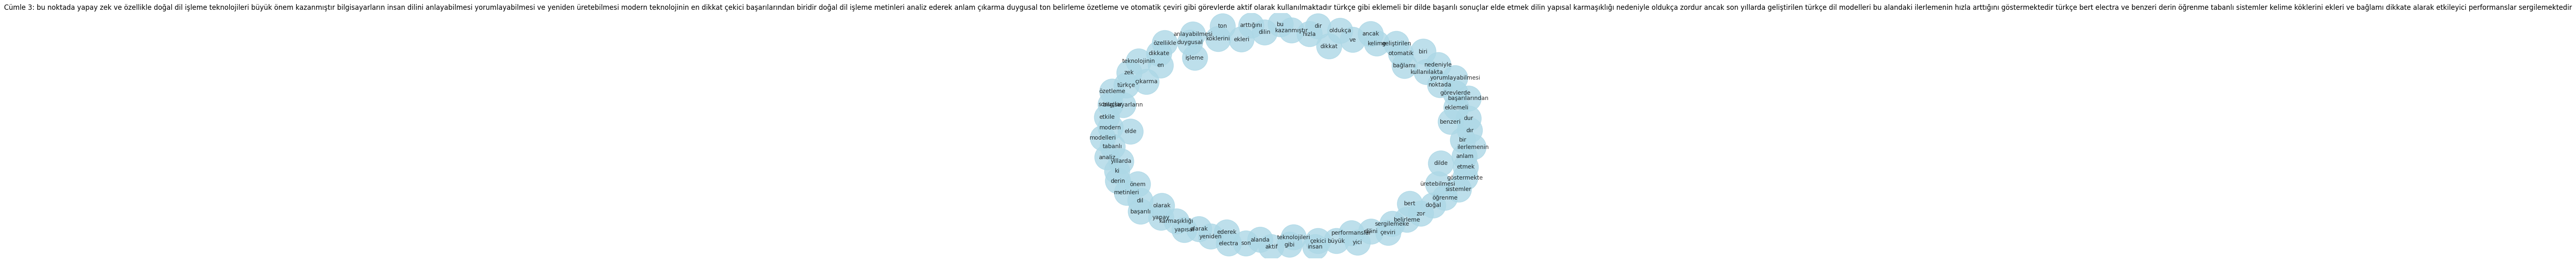

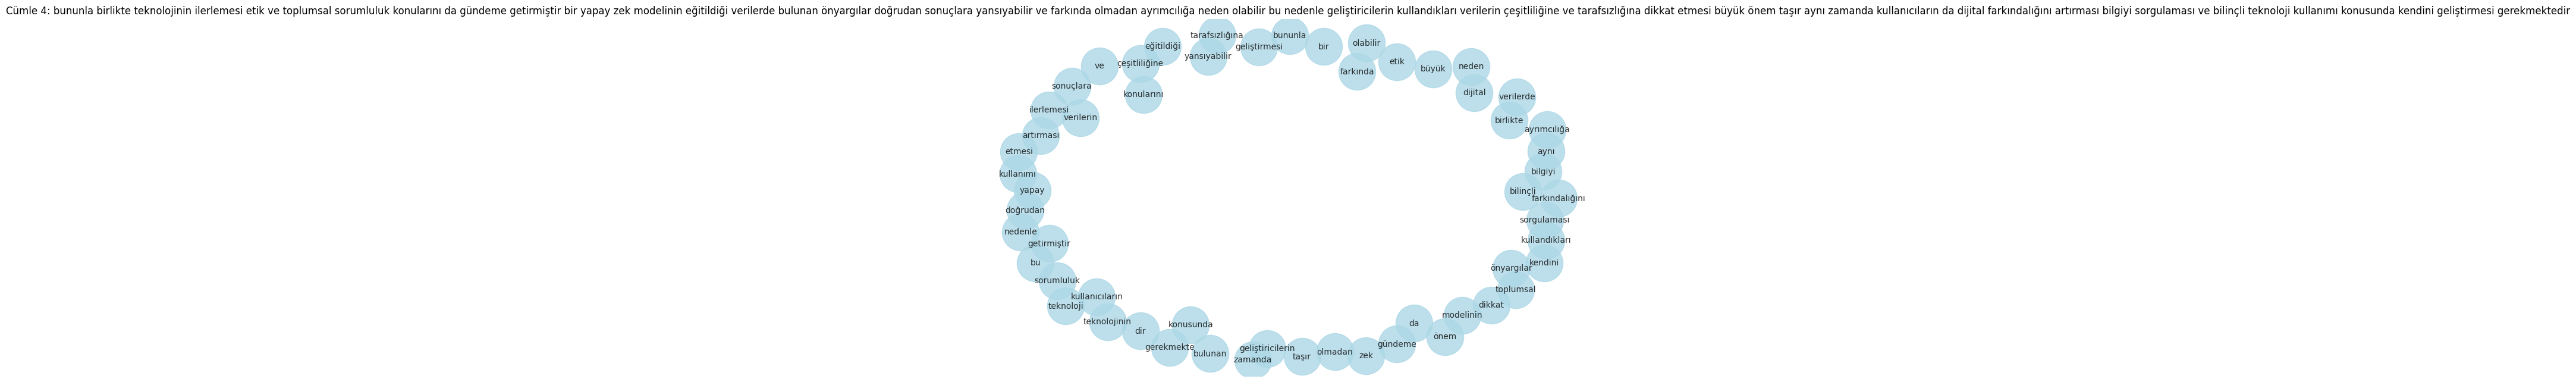

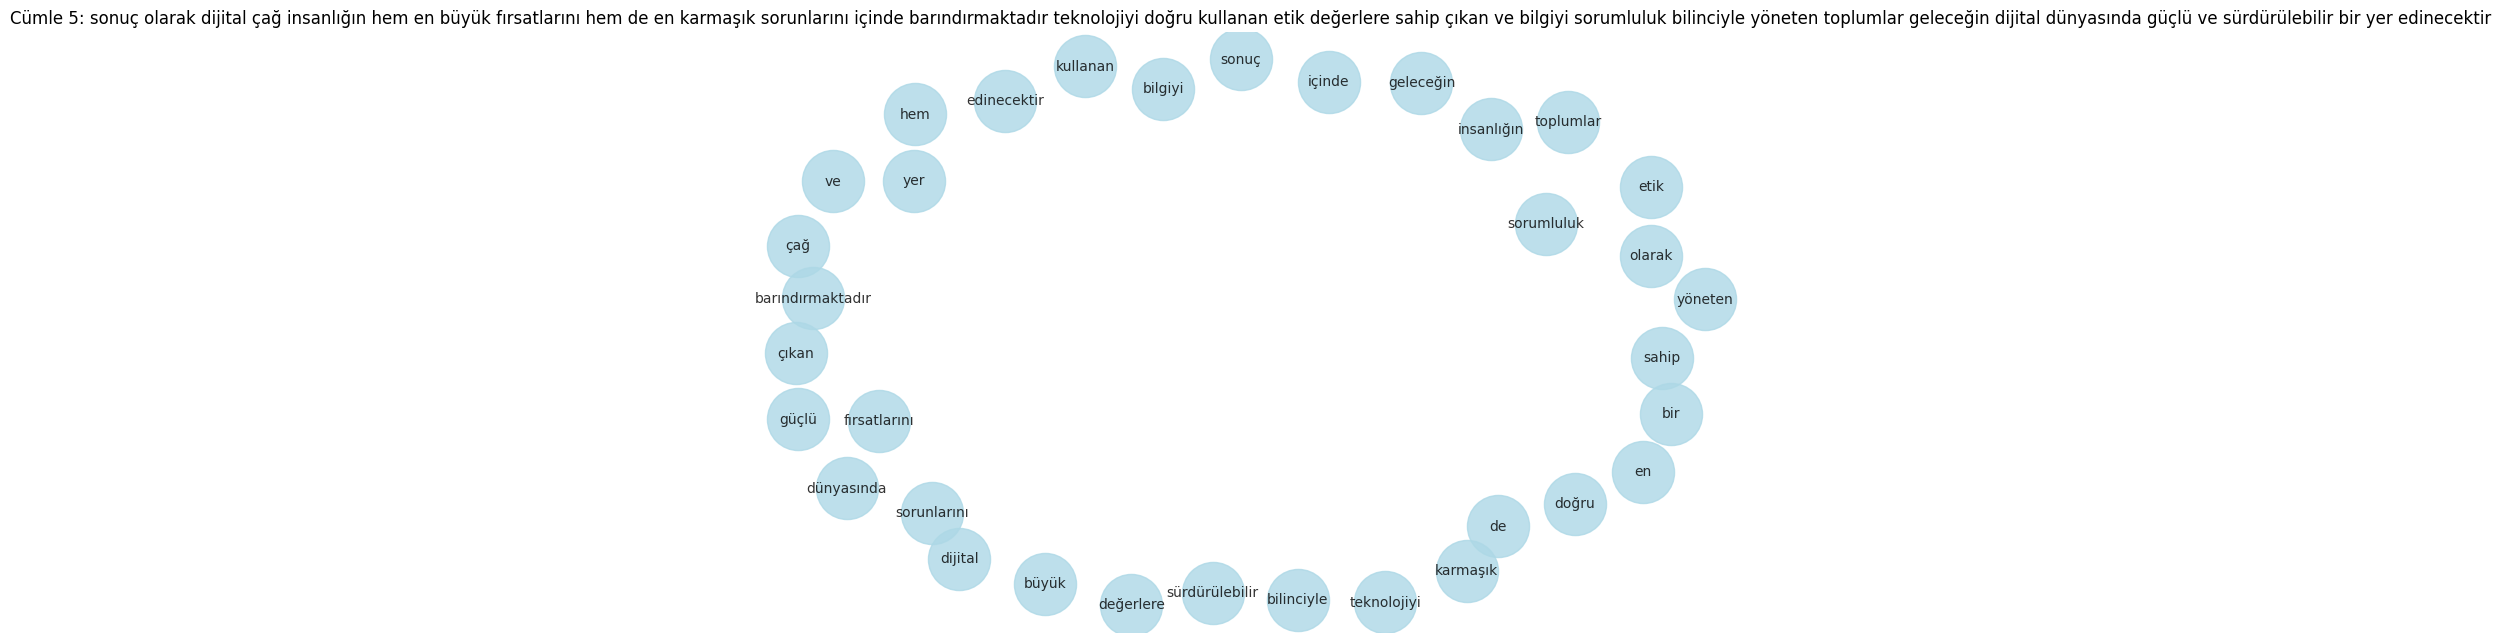

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

for i, sentence in enumerate(doc.sentences, 1):
    G = nx.DiGraph()
    for word in sentence.words:
        G.add_node(word.text)
        if word.head is not None and word.head > 0:
            head_word = sentence.words[word.head - 1].text
            G.add_edge(head_word, word.text, label=word.deprel)
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42, k=0.8)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightblue',
        node_size=2000,
        font_size=10,
        edge_color='gray',
        alpha=0.8
    )
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.title(f"Cümle {i}: {sentence.text}")
    plt.axis('off')
    plt.show()
